This notebook generates ballot-, candidate-, and party-MDS plots.

In [1]:
import glob
from Clustering_Functions import *
from sklearn.manifold import MDS  # type: ignore
import numpy as np
import seaborn as sns

BALLOT MDS PLOTS FROM PENTLAND HILLS

In [2]:
filename = 'scot-elex/7_cands/edinburgh_2017_ward2.csv'
num_cands, election, cand_list, ward = csv_parse(filename)
parties = party_abrevs(cand_list)

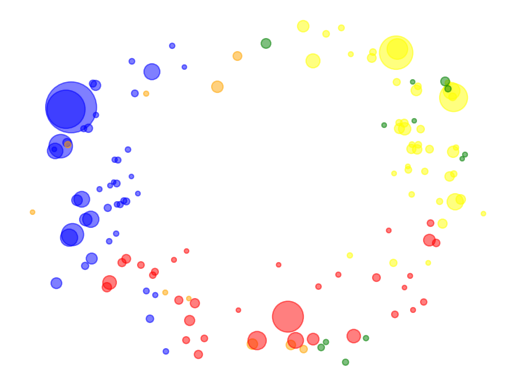

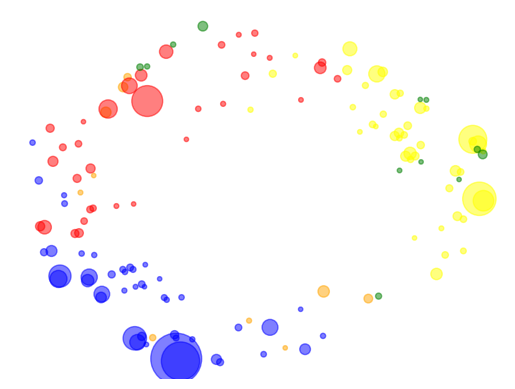

In [3]:
for trial in range(1,3):
    Ballot_MDS_plot(election, party_names=parties, filename=f"plots/PH_ballots_trial{trial}.jpg")

CANDIDATE MDS PLOTS FOR PENTLAND HILLS

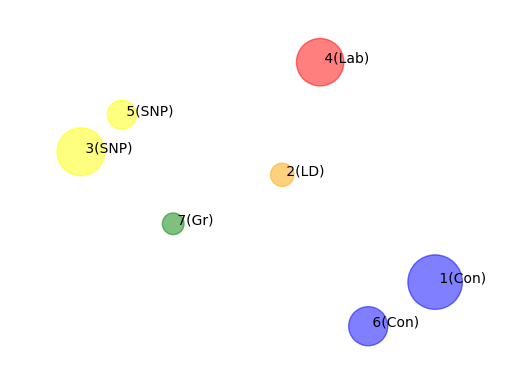

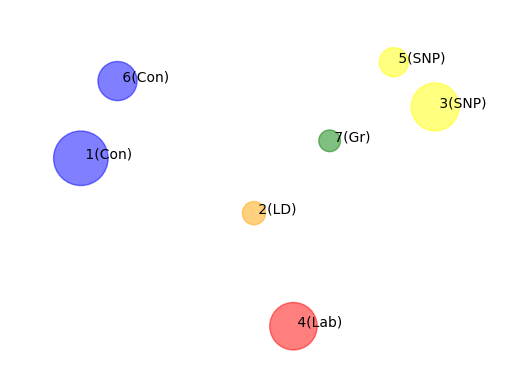

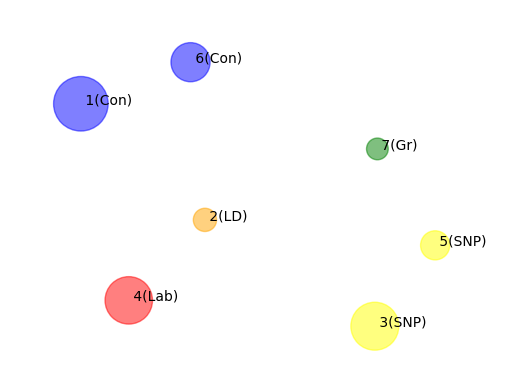

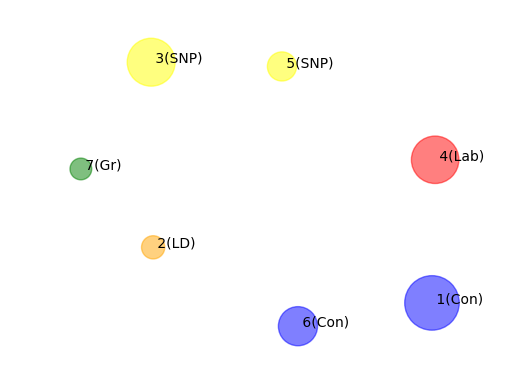

In [4]:
ls = [('borda',None),('borda_completion',None)]

for method,trunc in ls:
    for trial in range(1,3):
        name = f"plots/PH_{method}_trial{trial}.jpg"
        Candidate_MDS_plot(election, method=method, trunc = trunc, party_names=parties, party_colors='Auto', filename = name)

Next we'll create an MDS plot for the five major parties.  The distance between two parties is the average distance between candidates from those two parties running against each other (over all such candidate pairs in all elections).  We'll size the markers by the portion of first place votes that the party received (over all elections).

In [5]:
top_parties = ['SNP', 'Lab', 'Con', 'LD', 'Gr']
party_colors = ['yellow', 'red', 'blue', 'orange', 'green']

In [6]:
def Party_MDS_plot(top_parties=['SNP', 'Lab', 'Con', 'LD', 'Gr'], filename_list = 'Auto',
                   method = 'borda_completion', trunc = None, marker_scale = 5000, filename=None):
    if filename_list == 'Auto':
        filename_list = glob.glob("scot-elex/**/*.csv")

    # First generate first place vote tallies and pairwise distance matrix.
    pair_counts =  pd.DataFrame(np.zeros([len(top_parties),len(top_parties)]), index = top_parties, columns=top_parties)
    to_return =    pd.DataFrame(np.zeros([len(top_parties),len(top_parties)]), index = top_parties, columns=top_parties)
    party_fpv_counts = {party:0 for party in top_parties}

    for file in filename_list:
        num_cands, election, cand_names, location = csv_parse(file)
        party_list = party_abrevs(cand_names)
        
        # tally party first place votes
        for ballot, weight in election.items():
            party = party_list[ballot[0]-1]
            if party in top_parties:
                party_fpv_counts[party]+=weight
        
        # create pairwise distance matrix
        M = Candidate_dist_matrix(election, method = method, trunc=trunc)
        for i in range(len(party_list)):
            for j in range(len(party_list)):
                if i != j:
                    pi = party_list[i]
                    pj = party_list[j]
                    if pi in top_parties and pj in top_parties:
                        weight = M[i,j]
                        to_return[pi][pj] += weight/num_cands
                        pair_counts[pi][pj] +=1
    total = sum(party_fpv_counts.values())
    party_fpv_counts={x:y/total for x,y in party_fpv_counts.items()}
    M = to_return/pair_counts
    M = M.fillna(value=0.01)

    # Next generate the MDS plot
    projections = MDS(n_components=2, dissimilarity='precomputed').fit_transform(M)
    X = np.array([p[0] for p in projections])
    Y = np.array([p[1] for p in projections])

    fig, ax = plt.subplots()

    s = [marker_scale*party_fpv_counts[party] for party in top_parties]

    ax.scatter(X,Y, s=s, c = party_colors,alpha=.5)
    for count in range(len(top_parties)):
        ax.annotate(f" {top_parties[count]}", xy=(X[count], Y[count]))

    x_margin = (max(X) - min(X)) * 0.2  # 20% margin
    y_margin = (max(Y) - min(Y)) * 0.2  # 20% margin
    plt.xlim(min(X) - x_margin, max(X) + x_margin)
    plt.ylim(min(Y) - y_margin, max(Y) + y_margin)
    ax.grid(False)
    ax.axis('off')
    if filename != None:
        plt.savefig(filename, dpi=600)
    plt.show()

In [7]:
for year in [2012, 2017, 2022]:
    test = glob.glob(f"scot-elex/**/*{year}*.csv")
    print(year, len(test))

2012 353
2017 351
2022 345


plots/Parties_borda_completion_allyears_trial1.jpg


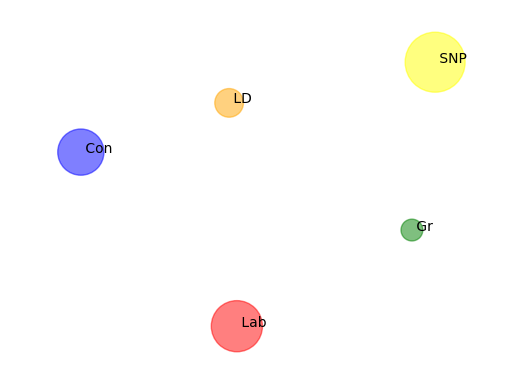

plots/Parties_borda_completion_2012_trial1.jpg


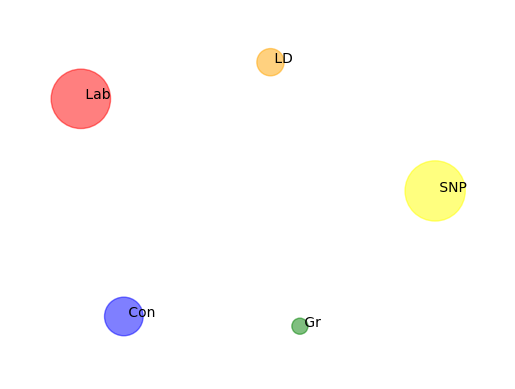

plots/Parties_borda_completion_2017_trial1.jpg


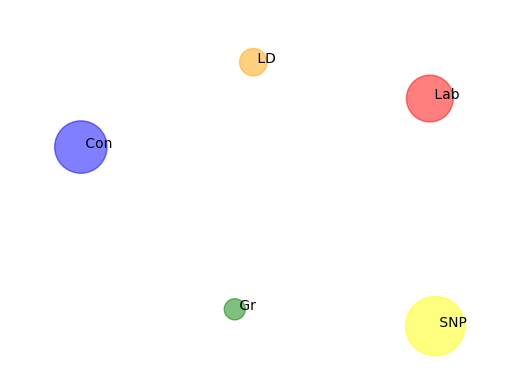

plots/Parties_borda_completion_2022_trial1.jpg


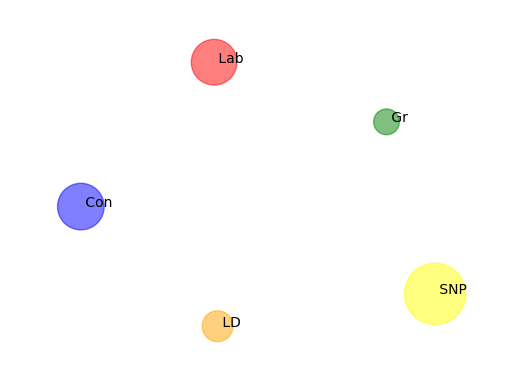

plots/Parties_borda_completion_allyears_trial2.jpg


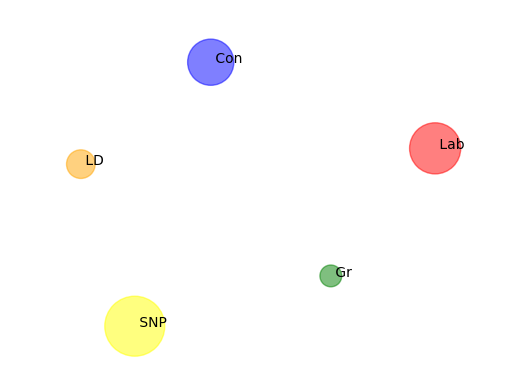

plots/Parties_borda_completion_2012_trial2.jpg


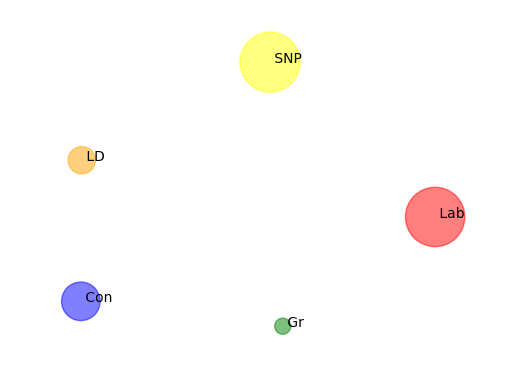

plots/Parties_borda_completion_2017_trial2.jpg


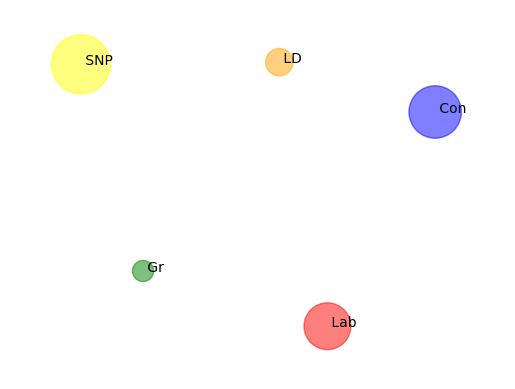

plots/Parties_borda_completion_2022_trial2.jpg


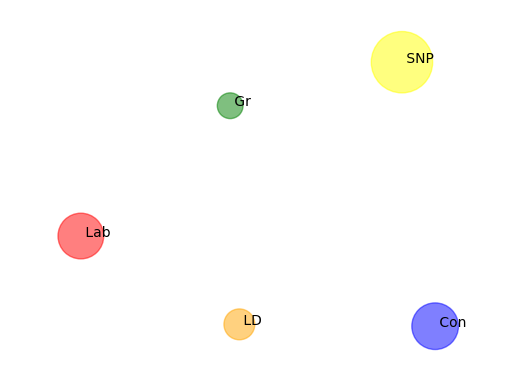

plots/Parties_borda_allyears_trial1.jpg


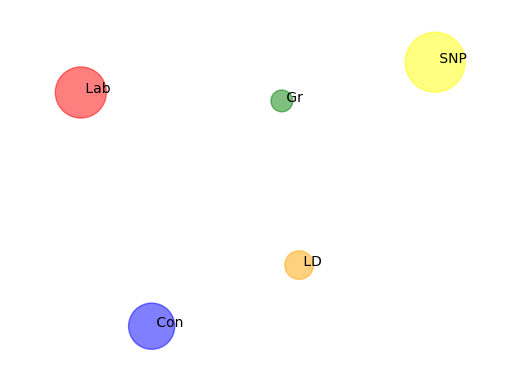

plots/Parties_borda_2012_trial1.jpg


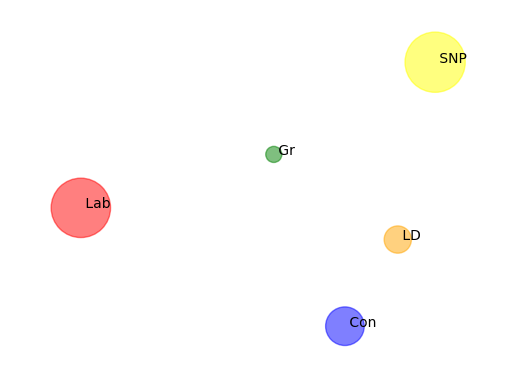

plots/Parties_borda_2017_trial1.jpg


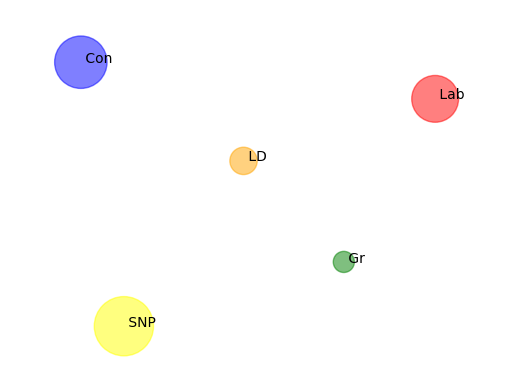

plots/Parties_borda_2022_trial1.jpg


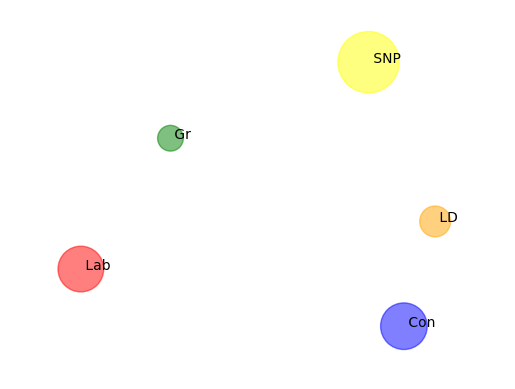

plots/Parties_borda_allyears_trial2.jpg


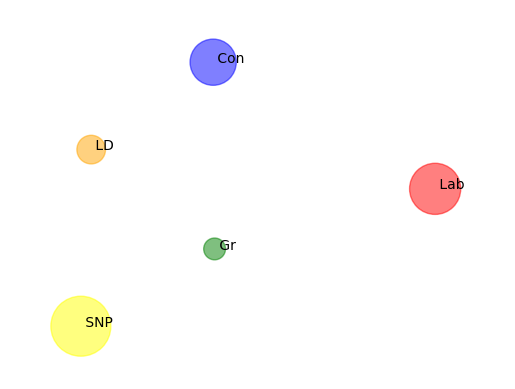

plots/Parties_borda_2012_trial2.jpg


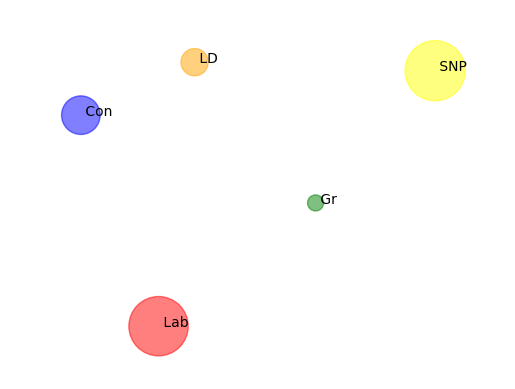

plots/Parties_borda_2017_trial2.jpg


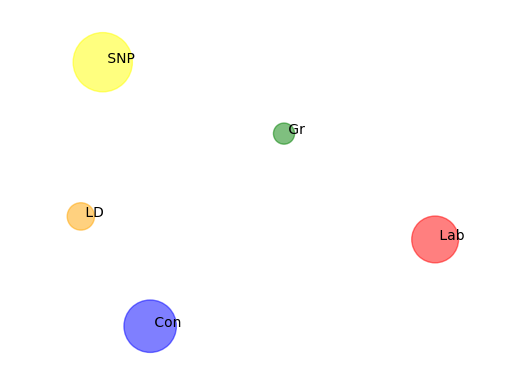

plots/Parties_borda_2022_trial2.jpg


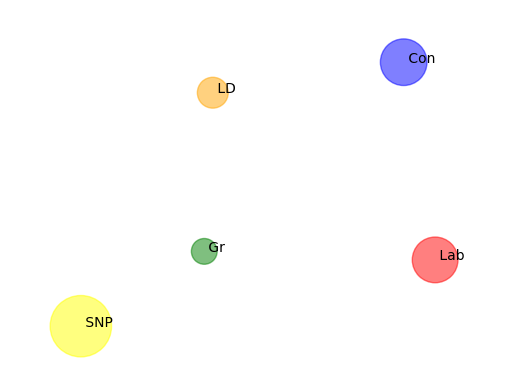

plots/Parties_successive_allyears_trial1.jpg


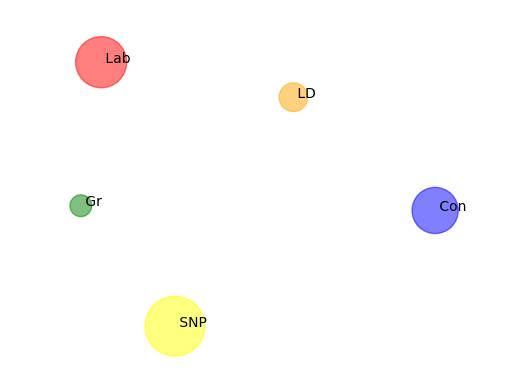

plots/Parties_successive_2012_trial1.jpg


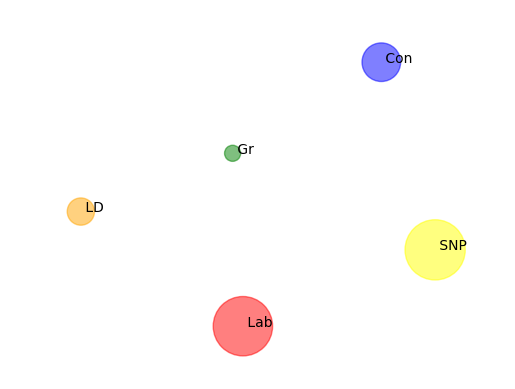

plots/Parties_successive_2017_trial1.jpg


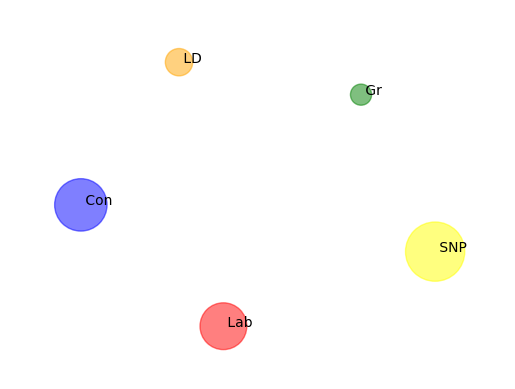

plots/Parties_successive_2022_trial1.jpg


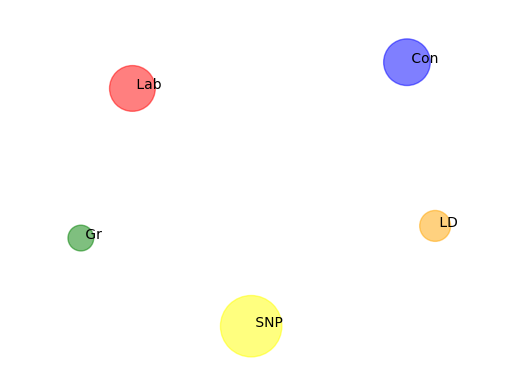

plots/Parties_successive_allyears_trial2.jpg


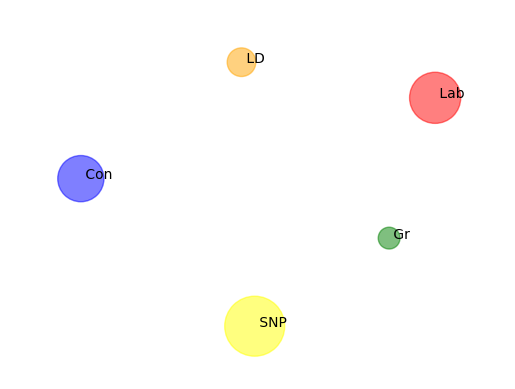

plots/Parties_successive_2012_trial2.jpg


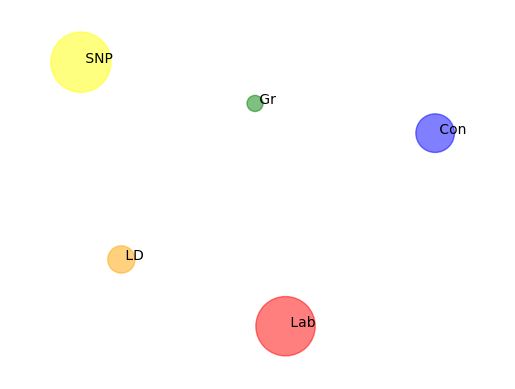

plots/Parties_successive_2017_trial2.jpg


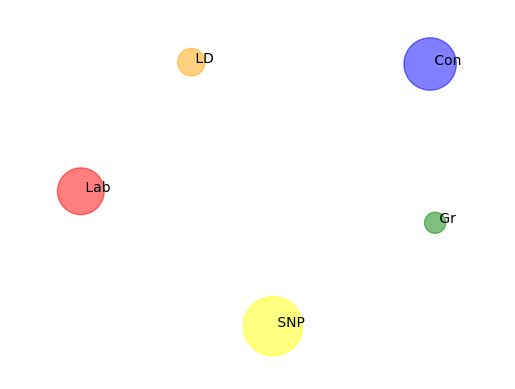

plots/Parties_successive_2022_trial2.jpg


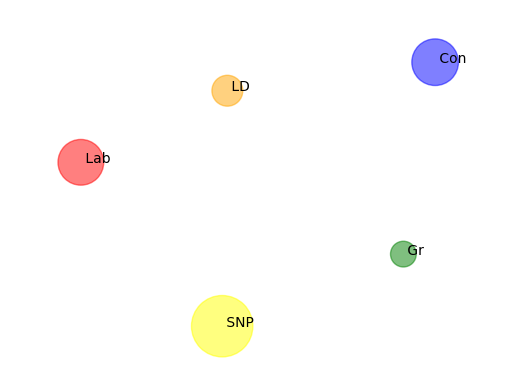

plots/Parties_coappearances_allyears_trial1.jpg


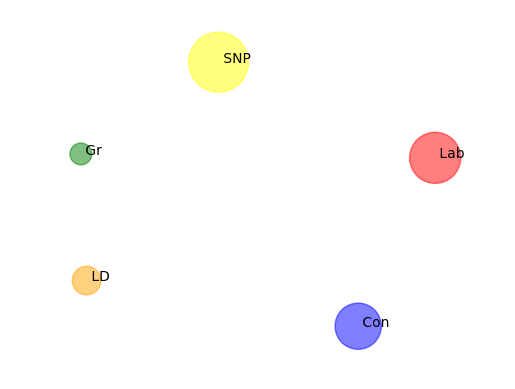

plots/Parties_coappearances_2012_trial1.jpg


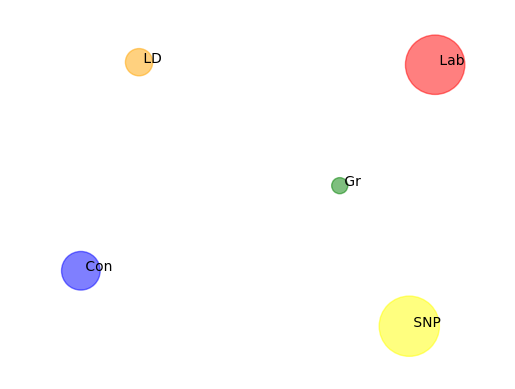

plots/Parties_coappearances_2017_trial1.jpg


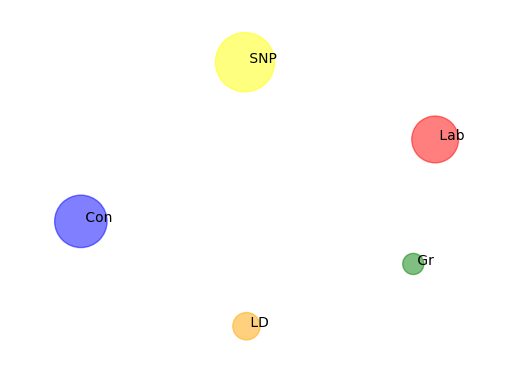

plots/Parties_coappearances_2022_trial1.jpg


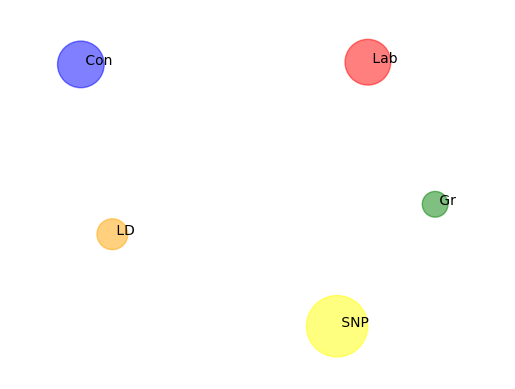

plots/Parties_coappearances_allyears_trial2.jpg


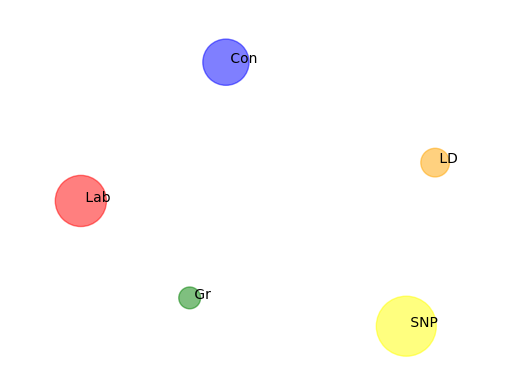

plots/Parties_coappearances_2012_trial2.jpg


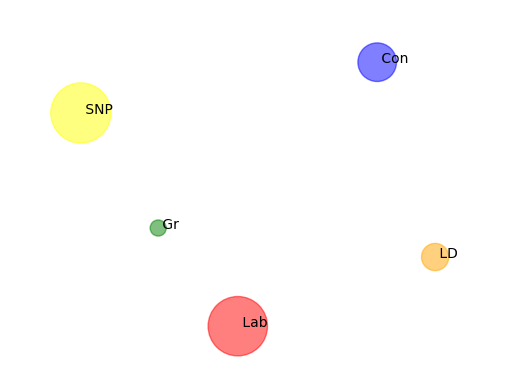

plots/Parties_coappearances_2017_trial2.jpg


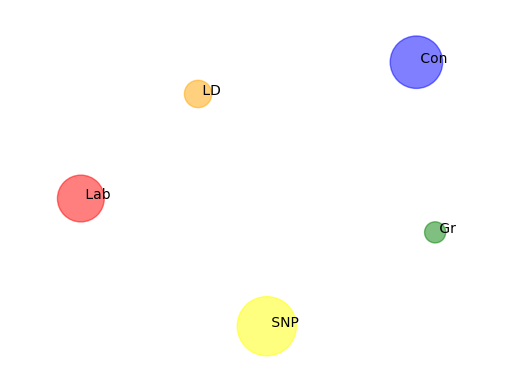

plots/Parties_coappearances_2022_trial2.jpg


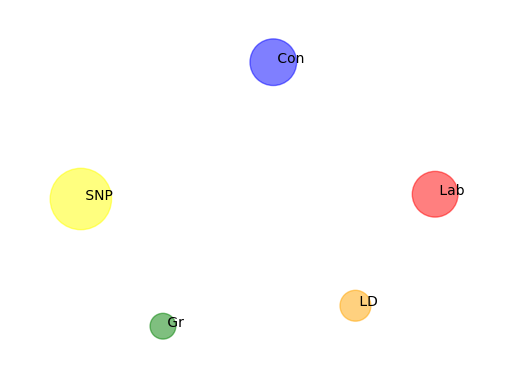

In [8]:
for method in ['borda_completion','borda','successive', 'coappearances']:
    for trial in [1,2]:
        filename_list = glob.glob(f"scot-elex/**/**.csv")
        name = f"plots/Parties_{method}_allyears_trial{trial}.jpg"
        print(name)
        Party_MDS_plot(method=method, filename_list=filename_list, filename=name)
        for year in [2012, 2017, 2022]:
            filename_list = glob.glob(f"scot-elex/**/*{year}*.csv")
            name = f"plots/Parties_{method}_{year}_trial{trial}.jpg"
            print(name)
            Party_MDS_plot(method=method, filename_list=filename_list, filename=name)

Now let's separate out the portion of the above code that created the pairwise distance matrix, so that we can study the matrix alone.

In [9]:
def Party_dist_matrix(top_parties=['SNP', 'Lab', 'Con', 'LD', 'Gr'], filename_list = 'Auto',
                   method = 'borda_completion', trunc = None):
    if filename_list == 'Auto':
        filename_list = glob.glob("scot-elex/**/*.csv")

    pair_counts =  pd.DataFrame(np.zeros([len(top_parties),len(top_parties)]), index = top_parties, columns=top_parties)
    to_return =    pd.DataFrame(np.zeros([len(top_parties),len(top_parties)]), index = top_parties, columns=top_parties)

    for file in filename_list:
        num_cands, election, cand_names, location = csv_parse(file)
        party_list = party_abrevs(cand_names)
    
        M = Candidate_dist_matrix(election, method = method, trunc=trunc)
        for i in range(len(party_list)):
            for j in range(len(party_list)):
                if i != j:
                    pi = party_list[i]
                    pj = party_list[j]
                    if pi in top_parties and pj in top_parties:
                        weight = M[i,j]
                        to_return[pi][pj] += weight/num_cands
                        pair_counts[pi][pj] +=1

    M = to_return/pair_counts
    M = M.fillna(value=0.01)
    return M

In [10]:
M_12 = Party_dist_matrix(method = 'borda_completion',filename_list = glob.glob(f"scot-elex/**/*2012*.csv"))
M_17 = Party_dist_matrix(method = 'borda_completion',filename_list = glob.glob(f"scot-elex/**/*2017*.csv"))
M_22 = Party_dist_matrix(method = 'borda_completion',filename_list = glob.glob(f"scot-elex/**/*2022*.csv"))

N_12 = Party_dist_matrix(method = 'borda',filename_list = glob.glob(f"scot-elex/**/*2012*.csv"))
N_17 = Party_dist_matrix(method = 'borda',filename_list = glob.glob(f"scot-elex/**/*2017*.csv"))
N_22 = Party_dist_matrix(method = 'borda',filename_list = glob.glob(f"scot-elex/**/*2022*.csv"))

In [11]:
N_d1 = N_17-N_12
N_d2 = N_22-N_17
N_d3 = N_22-N_12
M_d1 = M_17-M_12
M_d2 = M_22-M_17
M_d3 = M_22-M_12

In [12]:
def Heatmap(M):
    Mc = M.copy()
    for i in range(len(Mc)):
        for j in range(len(Mc)):
            if i>=j:
             Mc.iloc[i,j] = np.nan
    sns.heatmap(Mc, cmap = 'vlag')

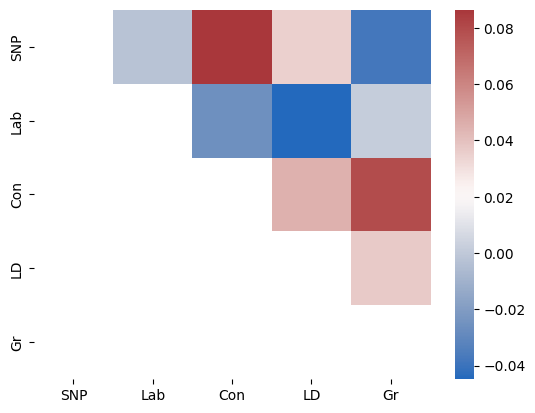

In [13]:
Heatmap(N_d3)

In [14]:
Decade = pd.DataFrame(np.zeros([len(top_parties),len(top_parties)]), index = top_parties, columns=top_parties)
for i in range(len(Decade)):
    for j in range(len(Decade)):
            if i>=j:
                Decade.iloc[i,j] = ' '
            else:
                 d = f"({round(N_17.iloc[i,j]-N_12.iloc[i,j],2)} , {round(N_22.iloc[i,j]-N_17.iloc[i,j],2)})"
                 Decade.iloc[i,j] = d

In [15]:
Decade

,SNP,Lab,Con,LD,Gr
SNP,,"(-0.02 , 0.02)","(0.09 , -0.0)","(0.02 , 0.02)","(-0.04 , 0.0)"
Lab,,,"(-0.02 , -0.01)","(-0.05 , 0.0)","(-0.01 , 0.01)"
Con,,,,"(0.05 , -0.0)","(0.07 , 0.01)"
LD,,,,,"(-0.0 , 0.04)"
Gr,,,,,


In [16]:
Decade.to_csv('tables/Decade.csv')